# matplotlib 시각화

## 1. pandas로 데이터 불러오기

In [21]:
import pandas as pd

In [22]:
df2 = pd.read_json("../driver.json")

In [23]:
df2

,FileInfo,UserInfo,Accessory,Annotation,ObjectInfo
FileName,Q_001_30_M_01_M0_G0_C0_01.jpg,NaN,NaN,2,NaN
Width,720,NaN,NaN,2,NaN
Height,1280,NaN,NaN,2,NaN
Channel,1,NaN,NaN,2,NaN
ID,NaN,1.0,NaN,2,NaN
Gender,NaN,1.0,NaN,2,NaN
Age,NaN,30.0,NaN,2,NaN
Mask,NaN,NaN,0.0,2,NaN
Glasses,NaN,NaN,0.0,2,NaN
Cap,NaN,NaN,0.0,2,NaN


## 2. 데이터 분류

In [24]:
df2_fileinfo = pd.DataFrame(df2.iloc[0:4,0]) # 파일정보 분류
df2_userinfo = pd.DataFrame(df2.iloc[4:7,1]) # 사용자 정보 분류
df2_accessory = pd.DataFrame(df2.iloc[7:10,2],dtype="bool") # 악세서리착용 여부 분류
df2_keypoints = pd.DataFrame(df2.iloc[-2,-1],dtype="float") # 시각화 값 분류
df2_boundingbox = pd.DataFrame(df2.iloc[-1,-1]) #기타 분류

In [25]:
df2_fileinfo

,FileInfo
FileName,Q_001_30_M_01_M0_G0_C0_01.jpg
Width,720
Height,1280
Channel,1


In [26]:
df2_userinfo

,UserInfo
ID,1.0
Gender,1.0
Age,30.0


In [27]:
df2_accessory

,Accessory
Mask,False
Glasses,False
Cap,False


In [28]:
df2_keypoints

,Count,Points
0,70.0,207.374
1,70.0,551.278
2,70.0,202.795
3,70.0,611.700
4,70.0,203.428
...,...,...
135,70.0,764.811
136,70.0,308.909
137,70.0,566.623
138,70.0,496.450


In [29]:
df2_boundingbox

,Face,Leye,Reye,Mouth,Cigar,Phone
isVisible,False,False,False,False,False,False
Position,"[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]","[0, 0, 0, 0]"
Opened,NaN,False,False,False,NaN,NaN


## 3. 시각화

<AxesSubplot:>

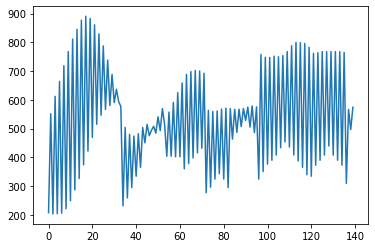

In [30]:
df2_keypoints["Points"].plot() # 간단 시각화, 값이 발산하는 형태로 보아 짝홀로 나누어서 시각화 하는 것을 생각함

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
arr_keypoints = np.array(df2_keypoints["Points"]) #판다스의 dataframe을 array형태로 변환
arr_keypoints[1::2] #짝수라벨 추출

array([207.374, 202.795, 203.428, 205.543, 220.888, 248.676, 286.388,
       326.085, 373.721, 421.357, 468.993, 514.645, 546.402, 566.251,
       580.144, 590.069, 594.038, 230.813, 258.6  , 294.328, 334.024,
       364.799, 450.103, 474.948, 507.72 , 540.473, 569.25 , 403.494,
       403.494, 401.509, 401.509, 359.827, 377.691, 397.539, 415.403,
       431.281, 276.464, 295.702, 324.1  , 342.575, 324.1  , 294.328,
       463.267, 486.532, 506.705, 528.204, 505.048, 485.537, 324.1  ,
       349.903, 376.106, 389.6  , 407.463, 433.266, 453.115, 435.574,
       407.864, 387.137, 364.905, 339.102, 334.024, 372.288, 389.6  ,
       407.463, 439.221, 407.463, 389.6  , 372.564, 308.909, 496.45 ])

In [33]:
arr_keypoints[1::2] #홀수 라벨 추출

array([551.278, 611.7  , 663.842, 718.576, 767.625, 811.292, 845.034,
       876.791, 890.685, 882.746, 860.913, 829.155, 787.474, 737.853,
       688.232, 636.626, 577.081, 503.642, 479.823, 473.869, 481.808,
       503.642, 514.549, 493.717, 483.787, 492.734, 514.594, 557.232,
       590.974, 624.717, 658.459, 688.232, 698.156, 702.125, 700.141,
       692.201, 563.187, 559.14 , 561.202, 567.767, 571.126, 569.141,
       566.928, 567.15 , 569.798, 574.431, 578.406, 575.427, 757.701,
       747.854, 747.3  , 751.746, 749.762, 753.731, 767.625, 787.875,
       799.784, 798.829, 795.814, 782.473, 761.671, 764.26 , 767.625,
       767.625, 767.625, 767.625, 767.625, 764.811, 566.623, 574.102])

AttributeError: module 'matplotlib.pyplot' has no attribute 'gcd'

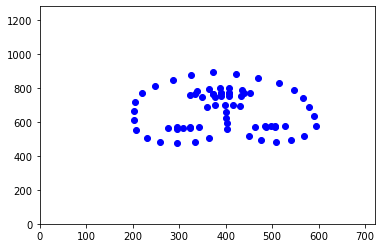

In [56]:
plt.plot(arr_keypoints[::2],arr_keypoints[1::2],"bo")
plt.xlim(0,720) #x축 범위
plt.ylim(0,1280)#y축 범위
plt.gcd().invert_ylable()
plt.show() #시각화

## 4. 원천데이터와 시각화 데이터 비교

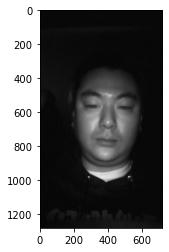

In [51]:
im = plt.imread("../driver.jpg") # 원본데이터 확인(이미지 불러오기)
plt.imshow(im)

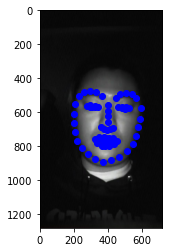

In [53]:
fig, ax = plt.subplots()
ax.imshow(im,extent=[0,720,1280,0]) #축 범위 지정
ax.plot(arr_keypoints[::2],arr_keypoints[1::2],'bo') # 원천데이터와 시각화한 데이터를 겹쳐서 비교